In [1]:
using DataFrames
using Distributions
using Gadfly
using Optim

### Example 2.2.1 (pp. 19–23)

The numbers of chronic medical conditions reported by samples of women living in large country towns or in more rural areas in New South Wales, Australia.

In [2]:
T = [0, 1, 1, 0, 2, 3, 0, 1, 1, 1, 1, 2, 0, 1, 3, 0, 1, 2, 1, 3, 3, 4, 1, 3, 2, 0];
C = [2, 0, 3, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2];

Under the null hypothesis, $H_0$, $\theta_{\text{T}} = \theta_{\text{C}} = \theta$, while under the alternative hypothesis, $H_1$, $\theta_{\text{T}} \neq \theta_{\text{C}}$.

If $H_0$ is true, the log-likelihood function for the counts is

$$\ell_0 = \ell(\theta; \mathbf{y}) = \sum_i (\text{T}_i \log \theta - \theta - \log \text{T}_i !) + \sum_i (\text{C}_i \log \theta - \theta - \log \text{C}_i !).$$

The maximum likelihood estimate is

$$\hat{\theta}_0 = \frac{\sum_i \text{T}_i + \sum_i \text{C}_i}{\lvert \text{T}\rvert + \lvert \text{C}\rvert}.$$

In [3]:
θ̂₀ = (sum(T) + sum(C)) / (size(T, 1) + size(C, 1))

1.183673469387755

In [4]:
ℓ(θ, Y) = mapreduce((y) -> y * log(θ) - θ - log(factorial(y)), +, 0, Y);

In [5]:
ℓ₀(θ) = ℓ(θ, T) + ℓ(θ, C);

In [6]:
ℓ̂₀ = ℓ₀(θ̂₀)

-68.3868179494798

If $H_1$ is true, the log-likelihood for the counts is

$$\ell_1 = \ell(\theta_\text{T}, \theta_\text{C}; \mathbf{y}) = \sum_i (\text{T}_i \log \theta_\text{T} - \theta_\text{T} - \log \text{T}_i !) + \sum_i (\text{C}_i \log \theta_\text{C} - \theta_\text{C} - \log \text{C}_i !) .$$

The maximum likelihood estimates are

$$\hat{\theta}_{1\text{T}} = \frac{\sum_i \text{T}_i}{\lvert \text{T}\rvert}$$

and

$$\hat{\theta}_{1\text{C}} = \frac{\sum_i \text{C}_i}{\lvert \text{C}\rvert}.$$

In [7]:
θ̂₁t = sum(T) / size(T, 1)

1.4230769230769231

In [8]:
θ̂₁c = sum(C) / size(C, 1)

0.9130434782608695

In [9]:
ℓ₁(θt, θc) = ℓ(θt, T) + ℓ(θc, C);

In [10]:
ℓ̂₁ = ℓ₁(θ̂₁t, θ̂₁c)

-67.02295175203457

The maximum value of the log-likelihood function $\ell_1$ will always be greater than or equal to that of $\ell_0$ as one more parameter has been fitted. To decide whether the difference is statistically significant, we need to know the sampling distribution of the log-likelihood function.

[Discussed later.]

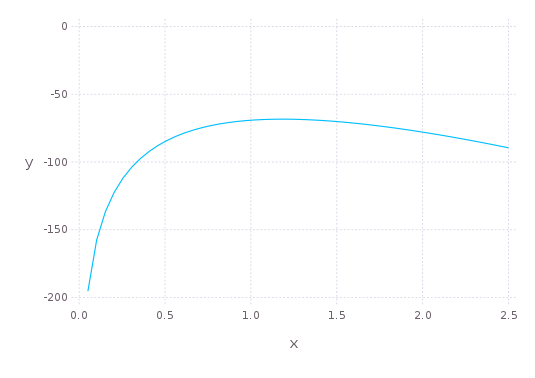

In [11]:
xs = linspace(0, 2.5)[2:end]

ys = Array{Float64}(size(xs))

for i in eachindex(xs)
    ys[i] = ℓ₀(xs[i])
end

plot(x = xs, y = ys, Geom.line)

In [12]:
θ̃₀ = optimize((θ) -> -ℓ₀(θ), 0, 2).minimum

1.1836734533008915

In [13]:
θ̃₀ = θ̂₀

1.183673469387755

In [14]:
d₀ = Poisson(θ̂₀)
d₁t = Poisson(θ̂₁t)
d₁c = Poisson(θ̂₁c);

In [15]:
x = 10
xs = 0:x

Ht = hist(T, -1:x)[2]
Hc = hist(C, -1:x)[2]
Htc = DataFrame(
    count = xs,
    T = Ht, C = Hc,
    T̂₀ = pdf(d₀, xs) .* length(T), C_hat_0 = pdf(d₀, xs) .* length(T),
    T̂₁ = pdf(d₁t, xs) .* length(T), Ĉ₁ = pdf(d₁c, xs) .* length(T)
)

 in depwarn at deprecated.jl:73
 in tty_size at deprecated.jl:924
 in show at /home/scottc/.julia/v0.5/DataFrames/src/abstractdataframe/show.jl:440
 [inlined code] from expr.jl:8
 in showcompact at show.jl:1425
 in writemime at replutil.jl:4
 [inlined code] from expr.jl:8
 in writemime at multimedia.jl:43
 in sprint at strings/io.jl:38
 in display_dict at /home/scottc/.julia/v0.4/IJulia/src/execute_request.jl:26
 in execute_request_0x535c5df2 at /home/scottc/.julia/v0.4/IJulia/src/execute_request.jl:212
 [inlined code] from dict.jl:733
 in eventloop at /home/scottc/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:435
while loading /home/scottc/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31


,count,T,C,T̂₀,C_hat_0,T̂₁,Ĉ₁
1,0,6,9,7.959952787608398,7.959952787608398,6.265257036899882,10.4338263291891
2,1,10,8,9.421984932271165,9.421984932271165,8.915942706357525,9.526537083172656
3,2,4,5,5.576276796650282,5.576276796650282,6.344036156446701,4.349071277100561
4,3,5,1,2.200163634052492,2.200163634052492,3.0093504844683068,1.3236303886827792
5,4,1,0,0.6510688304849211,0.6510688304849211,1.0706343069743014,0.3021330235036778
6,5,0,0,0.15413058027806295,0.15413058027806295,0.3047189950619166,0.055172117335454206
7,6,0,0,0.030406713116080446,0.030406713116080446,0.07227309498263407,0.008395756985829988
8,7,0,0,0.005141659943827015,0.005141659943827015,0.014692881947019015,0.0010950987372821722
9,8,0,0,0.0007607558080152215,0.0007607558080152215,0.0026136376540370366,0.0001249840950159001
10,9,0,0,0.00010005405184780689,0.00010005405184780689,0.0004132674923050015,1.2679545871178271e-5


In [16]:
Htcₗ = stack(Htc, collect(2:7))

,variable,value,count
1,T,6.0,0
2,T,10.0,1
3,T,4.0,2
4,T,5.0,3
5,T,1.0,4
6,T,0.0,5
7,T,0.0,6
8,T,0.0,7
9,T,0.0,8
10,T,0.0,9


 in depwarn at deprecated.jl:73
 in tty_size at deprecated.jl:924
 in getchunkbounds at /home/scottc/.julia/v0.5/DataFrames/src/abstractdataframe/show.jl:199
 in showrows at /home/scottc/.julia/v0.5/DataFrames/src/abstractdataframe/show.jl:338
 in show at /home/scottc/.julia/v0.5/DataFrames/src/abstractdataframe/show.jl:456
 [inlined code] from expr.jl:8
 in showcompact at show.jl:1425
 in writemime at replutil.jl:4
 [inlined code] from expr.jl:8
 in writemime at multimedia.jl:43
 in sprint at strings/io.jl:38
 in display_dict at /home/scottc/.julia/v0.4/IJulia/src/execute_request.jl:26
 in execute_request_0x535c5df2 at /home/scottc/.julia/v0.4/IJulia/src/execute_request.jl:212
 [inlined code] from dict.jl:733
 in eventloop at /home/scottc/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:435
while loading /home/scottc/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in tty_size at deprecated.jl:924
 in writemime at /home/

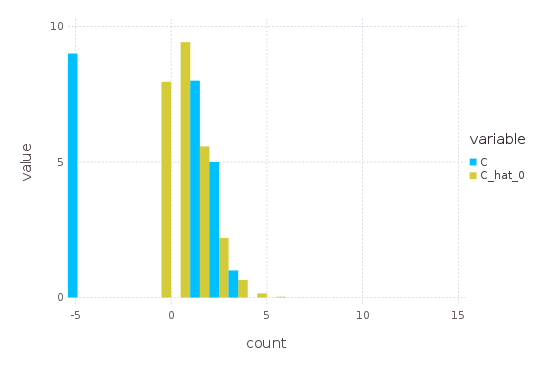

In [17]:
plot(
    Htcₗ[(col -> (col .== :C) | (col .== :C_hat_0))(Htcₗ[:variable]), :],
    x = :count, y = :value, color = :variable,
    Geom.bar(position = :dodge)
)

In [18]:
Htcₗ[(col -> (col .== :C) | (col .== :C_hat_0))(Htcₗ[:variable]), :]

,variable,value,count
1,C,9.0,0
2,C,8.0,1
3,C,5.0,2
4,C,1.0,3
5,C,0.0,4
6,C,0.0,5
7,C,0.0,6
8,C,0.0,7
9,C,0.0,8
10,C,0.0,9
